# Regression Models Tutorial  
In this notebook, we'll train and evaluate a regression models on a sample dataset. First, we'll use a `TreeRegressor` and then show other rule-based models.

We'll start by loading the dataset; in this case, the infamous golf dataset to predict if a given day has the adequate climate to play golf.

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd


def read_regression_dataset(url: str):
    df = pd.read_csv(url)
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return x, y


dataset_name = "golf_classification"
url = "https://raw.githubusercontent.com/facundoq/facundoq.github.io/refs/heads/master/datasets/regression/golf_regression_nominal.csv"

x, y = read_regression_dataset(url)

print(x.dtypes)
print(y)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ambiente       object
Temperatura    object
Humedad        object
Viento         object
dtype: object
0     25
1     30
2     46
3     45
4     52
5     23
6     43
7     35
8     38
9     46
10    48
11    52
12    44
13    30
Name: Juega, dtype: int64


# Model definition
Our model can be defined in the same way as a normal `sklearn.tree.DecisionTreeRegressor`, and it will use nominal attributes without a need for numerization.

Additionally you can specify hiperparameters of the model, which are analogous to the `sklearn` class of that name:

In [4]:
from sklearn_nominal import TreeRegressor

# default hiperparameters
model = TreeRegressor()

# custom hiperparameters
model = TreeRegressor(
    criterion="std", max_depth=4, min_samples_leaf=1, min_error_decrease=1e-16
)

# Training and evaluation

To make this short, we'll both train and evaluate on the train set using the typical `fit` and `predict` methods. This is no different than with any other `scikit-learn` models.

In [5]:
from sklearn.metrics import mean_absolute_error

model.fit(x, y)
y_pred = model.predict(x)
print(f"Dataset {dataset_name:40} MAE: {mean_absolute_error(y, y_pred):.2f}")

Dataset golf_classification                      MAE: 0.07


# Visualization
Finally, we'll want to visualize our trained tree. We have two choices: a plain text pretty printing of the tree with `model.pretty_print()`, or a full blown `graphviz` graph with `model.export_dot(...)` and relatives. Since this is a classification model, we'll want to pass the class names along for better output.



In [7]:
print(model.pretty_print())

root
|   🪵Ambiente=soleado => 
|   |   🪵Viento=no => 
|   |   |   🪵Temperatura=media => [45.5]
|   |   |   🪵Temperatura=baja => [52.]
|   |   🪵Viento=si => 
|   |   |   🪵Temperatura=baja => [23.]
|   |   |   🪵Temperatura=media => [30.]
|   🪵Ambiente=nublado => 
|   |   🪵Temperatura=alta => 
|   |   |   🪵Humedad=alta => [46.]
|   |   |   🪵Humedad=normal => [44.]
|   |   🪵Temperatura=baja => [43.]
|   |   🪵Temperatura=media => [52.]
|   🪵Ambiente=lluvioso => 
|   |   🪵Temperatura=alta => 
|   |   |   🪵Viento=no => [25.]
|   |   |   🪵Viento=si => [30.]
|   |   🪵Temperatura=media => 
|   |   |   🪵Humedad=alta => [35.]
|   |   |   🪵Humedad=normal => [48.]
|   |   🪵Temperatura=baja => [38.]


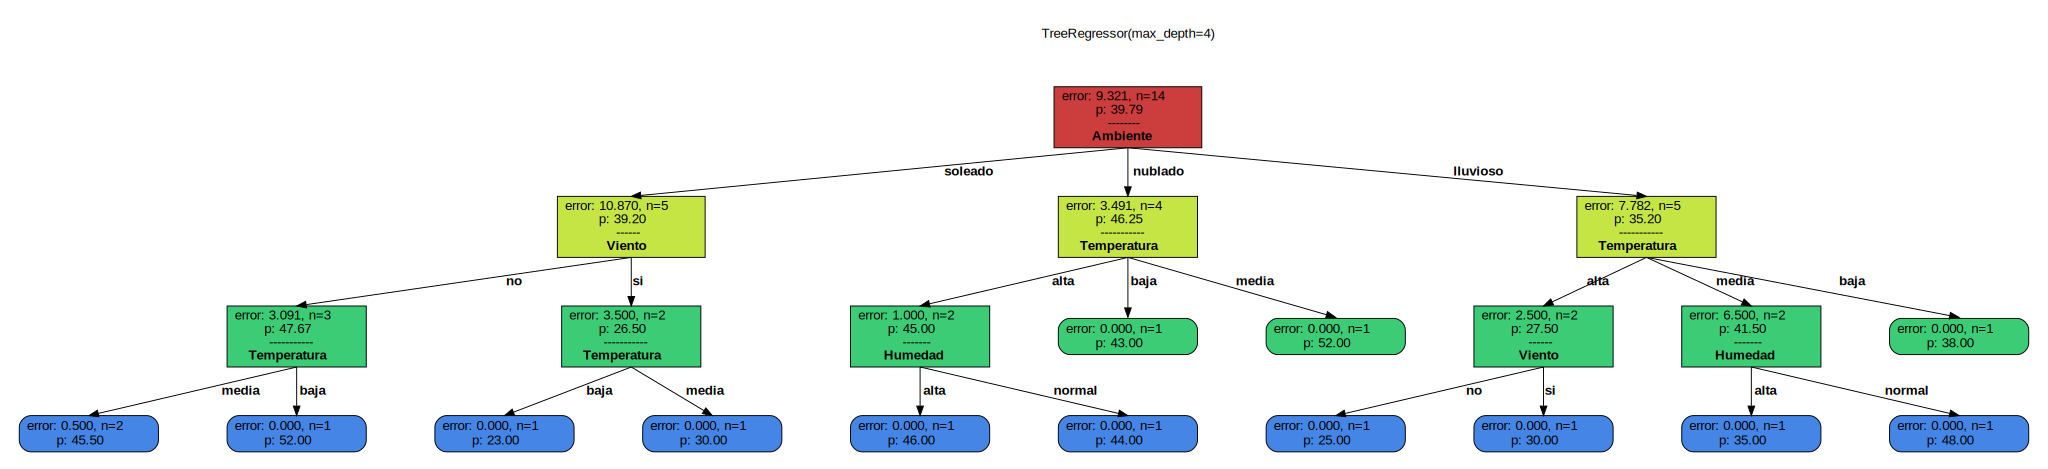

In [8]:
import graphviz

model.display(title=f"{model}")

# Other models
`sklearn_nominal` also offers  `CN2`, `OneR` and `ZeroR` [rule based regressors](https://christophm.github.io/interpretable-ml-book/rules.html). These are actually different training strategies, but they all generate the same type of `RuleModel` model.

1. [PRISM](https://www.sciencedirect.com/science/article/abs/pii/S0020737387800032)
2. [CN2](https://link.springer.com/article/10.1023/A:1022641700528)
3. [ZeroR/OneR](https://link.springer.com/article/10.1023/A:1022631118932)




In [ ]:
from sklearn_nominal.scikit.rule_cn2 import CN2Regressor
from sklearn_nominal.scikit.rule_oner import OneRRegressor
from sklearn_nominal.scikit.rule_zeror import ZeroRRegressor


models = [CN2Regressor(min_rule_support=1), OneRRegressor(), ZeroRRegressor()]

for model in models:
    model.fit(x, y)
    y_pred = model.predict(x)
    score = mean_absolute_error(y, y_pred)
    print(f"Model {model}")
    print(model.pretty_print())
    print(f"MAE: {score}")
    print("-" * 20)

Model CN2Regressor(min_rule_support=1)
(Ambiente=nublado) AND (Temperatura=baja) => [43.]
(Ambiente=nublado) AND (Temperatura=media) => [52.]
(Ambiente=nublado) AND (Humedad=alta) => [46.]
(Ambiente=nublado) => [44.]
(Temperatura=alta) AND (Viento=no) => [25.]
(Temperatura=alta) => [30.]
(Ambiente=lluvioso) AND (Temperatura=baja) => [38.]
(Viento=no) AND (Ambiente=lluvioso) => [35.]
(Ambiente=lluvioso) => [48.]
(Viento=no) AND (Temperatura=baja) => [52.]
(Temperatura=baja) => [23.]
(Humedad=normal) => [46.]
(Viento=no) => [45.]
Default: [30.]
MAE: 0.0
--------------------
Model OneRRegressor()
Ambiente=lluvioso => [35.2]
Ambiente=nublado => [46.25]
Ambiente=soleado => [39.2]
Default: [39.78571429]
MAE: 6.678571428571429
--------------------
Model ZeroRRegressor()
Default: [39.78571429]
MAE: 8.244897959183675
--------------------
